In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/ML_Lab/stroke_detection.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#df.fillna(df.mean())
df.replace(np.NAN,-1,inplace=True)


In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

Text(0, 0.5, 'avg_glucose_level')

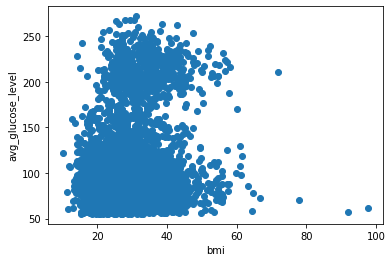

In [ ]:
plt.scatter(df.bmi,df.avg_glucose_level)
plt.xlabel('bmi')
plt.ylabel('avg_glucose_level')

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1


In [ ]:
km.cluster_centers_

array([[ 27.42047498,  89.28541849],
       [ 29.64333765, 200.75520052]])

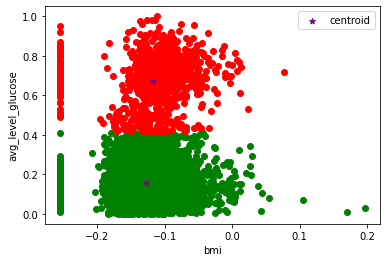

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
#plt.scatter(df3.bmi,df3.avg_glucose_level,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('bmi')
plt.ylabel('avg_level_glucose')
plt.legend()

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['avg_glucose_level']])
df['bmi'] = scaler.transform(df[['bmi']])

scaler.fit(df[['avg_glucose_level']])
df['avg_glucose_level'] = scaler.transform(df[['avg_glucose_level']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- bmi
Feature names seen at fit time, yet now missing:
- avg_glucose_level

  warnings.warn(message, FutureWarning)


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,1


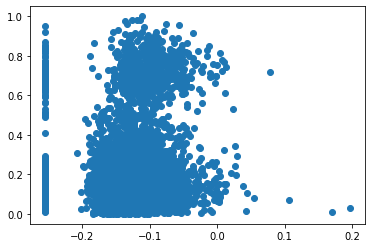

In [ ]:
plt.scatter(df.bmi,df.avg_glucose_level)


In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,1


In [ ]:
km.cluster_centers_

array([[-0.1278715 ,  0.15772052],
       [-0.11760993,  0.67230727]])

number of clusters=2 (optimal)

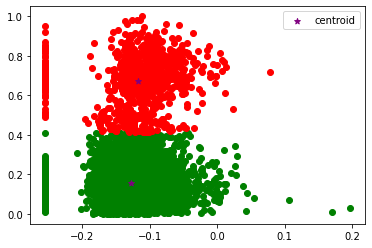

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
#df3 = df[df.cluster==2]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
#plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Method

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['bmi','avg_glucose_level']])
    sse.append(km.inertia_)

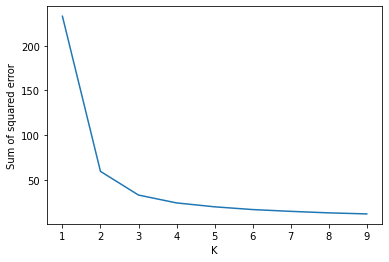

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)


number of clusters=3

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([1, 1, 0, ..., 2, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,1


In [ ]:
km.cluster_centers_

array([[-0.12819983,  0.27674989],
       [-0.1166601 ,  0.71116173],
       [-0.12750582,  0.10596272]])

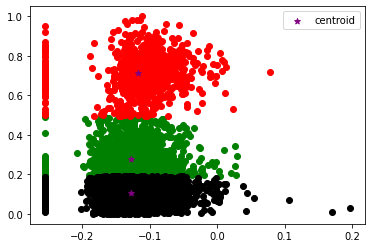

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
plt.scatter(df3.bmi,df3.avg_glucose_level,color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

number of clusters=4

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([1, 1, 3, ..., 0, 2, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,2
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,2


In [ ]:
km.cluster_centers_

array([[-0.12775154,  0.08360847],
       [-0.11496796,  0.72898753],
       [-0.12641655,  0.38553416],
       [-0.12833498,  0.20715102]])

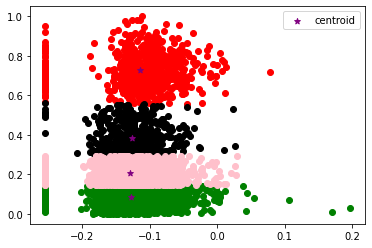

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
plt.scatter(df3.bmi,df3.avg_glucose_level,color='black')
plt.scatter(df4.bmi,df4.avg_glucose_level,color='pink')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

number of clusters=5

In [ ]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([1, 1, 4, ..., 0, 3, 0], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,4
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,3


In [ ]:
km.cluster_centers_

array([[-0.12712908,  0.1553068 ],
       [-0.11456533,  0.74003827],
       [-0.12752523,  0.06083788],
       [-0.12437063,  0.45708184],
       [-0.13019226,  0.26490596]])

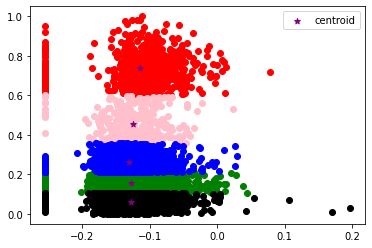

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
plt.scatter(df3.bmi,df3.avg_glucose_level,color='black')
plt.scatter(df4.bmi,df4.avg_glucose_level,color='pink')
plt.scatter(df5.bmi,df5.avg_glucose_level,color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

number of clusters=6

In [ ]:
km = KMeans(n_clusters=6)
y_predicted = km.fit_predict(df[['bmi','avg_glucose_level']])
y_predicted

array([2, 4, 3, ..., 5, 0, 5], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,cluster
0,9046,Male,67.0,0,1,Yes,Private,Urban,0.801265,-0.085495,formerly smoked,1,2
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,0.679023,-0.254455,never smoked,1,4
2,31112,Male,80.0,0,1,Yes,Private,Rural,0.234512,-0.104422,never smoked,1,3
3,60182,Female,49.0,0,0,Yes,Private,Urban,0.536008,-0.095651,smokes,1,4
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,0.549349,-0.143662,never smoked,1,4


In [ ]:
km.cluster_centers_

array([[-0.12487691,  0.40933951],
       [-0.12745732,  0.05703721],
       [-0.1115458 ,  0.80411922],
       [-0.13036402,  0.25196259],
       [-0.11842036,  0.6485684 ],
       [-0.1272004 ,  0.14859792]])

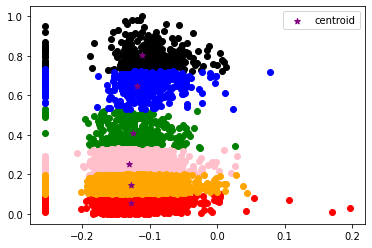

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
df6 = df[df.cluster==5]
plt.scatter(df1.bmi,df1.avg_glucose_level,color='green')
plt.scatter(df2.bmi,df2.avg_glucose_level,color='red')
plt.scatter(df3.bmi,df3.avg_glucose_level,color='black')
plt.scatter(df4.bmi,df4.avg_glucose_level,color='pink')
plt.scatter(df5.bmi,df5.avg_glucose_level,color='blue')
plt.scatter(df6.bmi,df6.avg_glucose_level,color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()